In [4]:
#Question 1.
#Statistical significance is assessed using hypothesis testing. The process typically involves:

#Formulating Hypotheses:

#Null Hypothesis (h0): Assumes no effect or no difference.
#Alternative Hypothesis (𝐻𝑎​): Assumes a significant effect or difference.

#Selecting a Test: Depending on the data and problem, tests like t-tests, chi-square tests, or ANOVA are used.

#Calculating the Test Statistic: Based on sample data, a statistic (e.g., t-statistic, chi-squared value) is computed.

#Determining the p-value:

#The p-value indicates the probability of observing the data if the null hypothesis is true.
#A p-value less than the significance level ( 𝛼 , often 0.05) suggests rejecting H0​

#Conclusion:
#If p<α, the result is statistically significant, meaning the observed insight is unlikely to be due to random chance.#

In [5]:
#To assess statistical significance, you can perform hypothesis tests like t-tests or chi-square tests.

#Example: t-test

In [2]:
from scipy.stats import ttest_ind

# Sample data
group1 = [68, 75, 78, 71, 67]
group2 = [63, 74, 76, 80, 69]

# Perform independent t-test
t_stat, p_value = ttest_ind(group1, group2)

# Evaluate significance
alpha = 0.05
if p_value < alpha:
    print("Statistically significant (reject null hypothesis).")
else:
    print("Not statistically significant (fail to reject null hypothesis).")

Not statistically significant (fail to reject null hypothesis).


In [ ]:
#Question 2

#The Central Limit Theorem (CLT) states that the sampling distribution of the sample mean (or sum) approaches a normal distribution, regardless of the population's original distribution, as the sample size increases (typically n ≥30).

#It allows us to apply parametric statistical methods (like z-tests and t-tests) even if the population distribution is unknown.
#It underpins the concept of confidence intervals and hypothesis testing by providing a foundation for inference on population parameters.

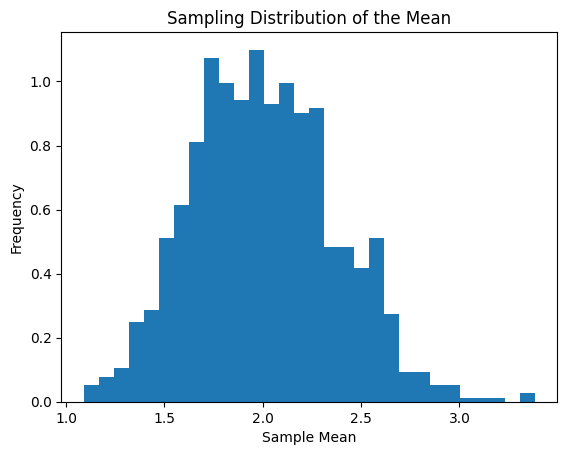

In [6]:
#You can simulate the CLT by taking multiple samples and calculating the means.
import numpy as np
import matplotlib.pyplot as plt

# Generate a non-normal population
population = np.random.exponential(scale=2, size=10000)

# Draw sample means
sample_means = [np.mean(np.random.choice(population, size=30, replace=False)) for _ in range(1000)]

# Plot the sampling distribution
plt.hist(sample_means, bins=30, density=True)
plt.title("Sampling Distribution of the Mean")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()




In [7]:
#Question 3

#Statistical power is the probability of correctly rejecting the null hypothesis when the alternative hypothesis is true. In other words, it measures the ability of a test to detect an effect, if one exists.

#Key components affecting power:

#Sample size: Larger samples increase power.
#Effect size: Larger differences or stronger relationships are easier to detect.
#Significance level (α): A higher significance level increases power but also increases the risk of Type I error.
#Variance: Lower variance leads to higher power.
#it is important because of  High statistical power reduces the risk of a Type II error (failing to detect a true effect).

In [8]:
#To calculate statistical power, you can use statsmodels.

from statsmodels.stats.power import TTestIndPower

# Define parameters
effect_size = 0.5  # Difference between means divided by standard deviation
alpha = 0.05       # Significance level
power = 0.8        # Desired power

# Calculate sample size needed
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)
print(f"Required sample size: {sample_size:.2f}")


Required sample size: 63.77


In [ ]:
#Question 4

#Bias can be controlled by:

#Randomization: Assigning subjects randomly to different groups to reduce selection bias.
#Blinding: Using single or double-blind experiments to reduce observer or participant bias.
#Standardization: Ensuring consistent data collection methods to avoid measurement bias.
#Using Control Groups: Comparing results against a baseline or control group.
#Pre-Registration: Specifying the hypothesis and analysis plan before collecting data to prevent p-hacking or selective reporting.
#Statistical Adjustments: Using techniques like propensity score matching to account for confounders.

In [10]:
#Control for bias by randomizing or standardizing processes. Below is an example of random assignment for A/B testing:

import random

# Assign subjects randomly to groups
subjects = list(range(1, 101))
group_A = random.sample(subjects, k=50)
group_B = [s for s in subjects if s not in group_A]

print("Group A:", group_A)
print("Group B:", group_B)

Group A: [54, 60, 57, 77, 71, 98, 51, 29, 49, 87, 63, 20, 26, 11, 22, 9, 37, 38, 64, 92, 91, 67, 90, 65, 68, 97, 100, 19, 24, 39, 6, 78, 43, 93, 69, 23, 28, 85, 62, 94, 52, 2, 36, 99, 14, 8, 5, 31, 88, 10]
Group B: [1, 3, 4, 7, 12, 13, 15, 16, 17, 18, 21, 25, 27, 30, 32, 33, 34, 35, 40, 41, 42, 44, 45, 46, 47, 48, 50, 53, 55, 56, 58, 59, 61, 66, 70, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 84, 86, 89, 95, 96]


In [ ]:
#Question 5

#Confounding variables are external factors that affect both the independent and dependent variables, creating a false association or masking a true relationship.

#Example:

#If studying the effect of exercise on weight loss, diet is a confounding variable because it impacts weight loss independently of exercise.

#How to address them:

#Include confounders as covariates in regression models.
#Randomize experimental conditions to distribute confounders evenly across groups.

In [11]:
#Use regression to control for confounders.

import statsmodels.api as sm
import pandas as pd

# Simulate data
data = pd.DataFrame({
    'exercise': [1, 0, 1, 0, 1, 0],
    'diet': [1, 1, 0, 0, 1, 1],
    'weight_loss': [5, 2, 4, 1, 6, 3]
})

# Add confounder (diet) to the regression model
X = data[['exercise', 'diet']]
X = sm.add_constant(X)  # Add intercept
y = data['weight_loss']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            weight_loss   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     24.75
Date:                Fri, 22 Nov 2024   Prob (F-statistic):             0.0137
Time:                        17:35:13   Log-Likelihood:                -3.1384
No. Observations:                   6   AIC:                             12.28
Df Residuals:                       3   BIC:                             11.65
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000      0.471      2.121      0.1

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [ ]:
#Question 6

#A/B testing is a controlled experiment used to compare two variants (A and B) to determine which performs better on a specific metric.

#Steps:

#Split participants into two groups randomly:
#Group A: Receives the current version (control).
#Group B: Receives the modified version (treatment).
#Measure the performance of each group on the desired metric (e.g., conversion rate).
#Conduct statistical tests (e.g., t-test, chi-square test) to determine if the difference in performance is statistically significant.
#Applications: Widely used in marketing, product development, and web optimization to make data-driven decisions.

In [12]:
#Perform an A/B test with a t-test or chi-square test.
from scipy.stats import ttest_ind

# Simulated data: Conversion rates for A and B
A = [1, 0, 1, 1, 0, 0, 1, 1, 0, 1]
B = [0, 1, 0, 1, 0, 1, 0, 0, 1, 1]

# Perform t-test
t_stat, p_value = ttest_ind(A, B)
if p_value < 0.05:
    print("Statistically significant difference between A and B.")
else:
    print("No significant difference between A and B.")


No significant difference between A and B.


In [13]:
#Question 7.

#A confidence interval (CI) provides a range of values within which the true population parameter (e.g., mean, proportion) is likely to fall with a specified level of confidence (e.g., 95%).

#Key elements:

#Point estimate: The sample statistic (e.g., sample mean).
#Margin of error: Accounts for sampling variability, based on the standard error and the critical value (z or t).
#Confidence level: Indicates the proportion of intervals that would capture the true parameter if repeated sampling were performed.

#Example:

#A 95% CI of [4.5, 6.5] for a mean indicates we are 95% confident that the population mean lies between 4.5 and 6.5.
#it's important because CIs provide a measure of precision and reliability for estimates, supplementing hypothesis testing with additional context.



In [14]:
#Calculate confidence intervals for a sample mean.

import numpy as np
from scipy.stats import norm

# Sample data
data = [12, 15, 14, 10, 13, 14, 16, 15]
mean = np.mean(data)
std_error = np.std(data, ddof=1) / np.sqrt(len(data))

# 95% Confidence Interval
z = norm.ppf(0.975)  # Critical value for 95% CI
margin_of_error = z * std_error
ci_lower = mean - margin_of_error
ci_upper = mean + margin_of_error

print(f"95% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")


95% Confidence Interval: [12.29, 14.96]
